In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn import datasets, linear_model, metrics 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split 
import seaborn as sns
import statsmodels
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_excel('Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# Checking Unique Values

In [3]:
df.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [4]:
df.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [5]:
df.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [6]:
df.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

# Data Cleaning

In [7]:
df.Additional_Info=df.Additional_Info.replace('No Info','No info')

In [8]:
df.drop(columns=['Route'],inplace=True)

In [9]:
df.drop(columns=['Dep_Time','Arrival_Time'],inplace=True)

In [10]:
#df.drop(columns=['Date_of_Journey'],inplace=True)

In [11]:
df.Destination.replace('New Delhi','Delhi',inplace=True)

In [12]:
df.replace('Delhi',1,inplace=True)
df.replace('Banglore',2,inplace=True)
df.replace('Cochin',3,inplace=True)
df.replace('Kolkata',4,inplace=True)
df.replace('Hyderabad',5,inplace=True)
df.replace('Chennai',6,inplace=True)
df.replace('Hyderabad',7,inplace=True)

In [13]:
df.replace('Mumbai',8,inplace=True)

In [14]:
df.Destination.unique()

array([1, 2, 3, 4, 5])

In [15]:
df.Source.unique()

array([2, 4, 1, 6, 8])

In [16]:
df.Total_Stops.isnull().sum()

1

In [17]:
df.dropna(inplace=True)

In [18]:
df.Total_Stops.replace('non-stop','0 stop',inplace=True)

In [19]:
df.Total_Stops=df.Total_Stops.apply(lambda x: int(x.split(' ')[0]))

# Creating Dummy Variables

In [20]:
df = pd.get_dummies(df, columns=['Total_Stops'],drop_first=True)
#TS_dummy=pd.get_dummies(df.Total_Stops,prefix="Total_Stops")
#TS_dummy

In [21]:
df = pd.get_dummies(df, columns=['Source'],drop_first=True)
df = pd.get_dummies(df, columns=['Destination'],drop_first=True)

In [22]:
df = pd.get_dummies(df, columns=['Additional_Info'],drop_first=True)


In [23]:
h = df['Duration'].str.extract('(\d+)h', expand=False).astype(float) * 60
m = df['Duration'].str.extract('(\d+)m', expand=False).astype(float)
df['Duration'] = h.add(m, fill_value=0).astype(int)

In [24]:
df.Duration=df.Duration.astype(float)

In [25]:
df.Price=df.Price.astype(float)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 24 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Airline                                       10682 non-null  object 
 1   Date_of_Journey                               10682 non-null  object 
 2   Duration                                      10682 non-null  float64
 3   Price                                         10682 non-null  float64
 4   Total_Stops_1                                 10682 non-null  uint8  
 5   Total_Stops_2                                 10682 non-null  uint8  
 6   Total_Stops_3                                 10682 non-null  uint8  
 7   Total_Stops_4                                 10682 non-null  uint8  
 8   Source_2                                      10682 non-null  uint8  
 9   Source_4                                      10682 non-null 

In [27]:
df.Date_of_Journey=df.Date_of_Journey.astype('datetime64[ns]')

In [28]:
df

,Airline,Date_of_Journey,Duration,Price,Total_Stops_1,Total_Stops_2,Total_Stops_3,Total_Stops_4,Source_2,Source_4,Source_6,Source_8,Destination_2,Destination_3,Destination_4,Destination_5,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,IndiGo,2019-03-24,170.0,3897.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,Air India,2019-01-05,445.0,7662.0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,Jet Airways,2019-09-06,1140.0,13882.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,IndiGo,2019-12-05,325.0,6218.0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,IndiGo,2019-01-03,285.0,13302.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,150.0,4107.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
10679,Air India,2019-04-27,155.0,4145.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
10680,Jet Airways,2019-04-27,180.0,7229.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
10681,Vistara,2019-01-03,160.0,12648.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


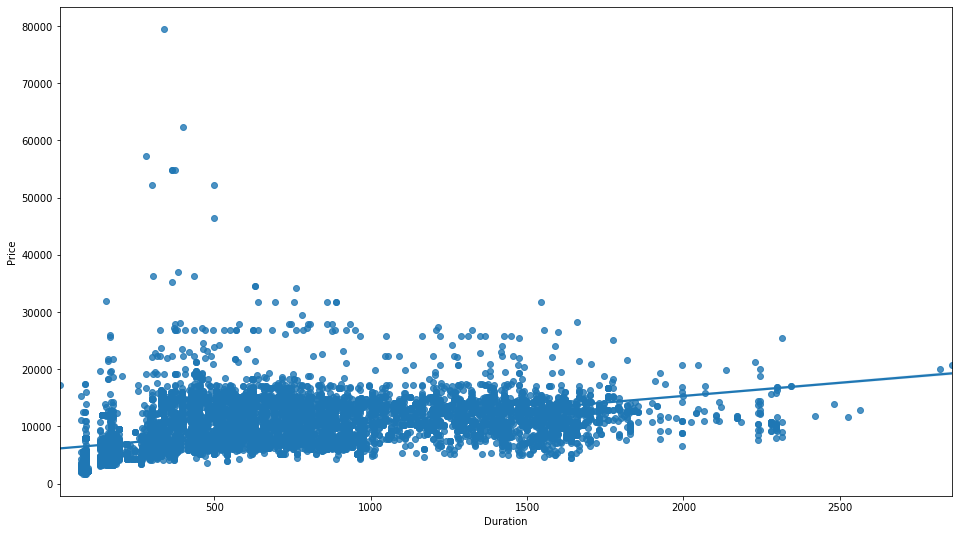

In [29]:
plt.figure(figsize= (16,9))
sns.regplot(x ="Duration", y ="Price",data = df)

In [30]:
#plt.figure(figsize= (16,9))
#sns.regplot(x ="Total_Stops", y ="Price",data = df)

In [31]:
#df.Duration.values.reshape(-1,1)
#df.Price.values.reshape(-1,1)

In [32]:
#plt.bar(df.Additional_Info,df.Price)
#plt.xticks(rotation=90)
#plt.show()

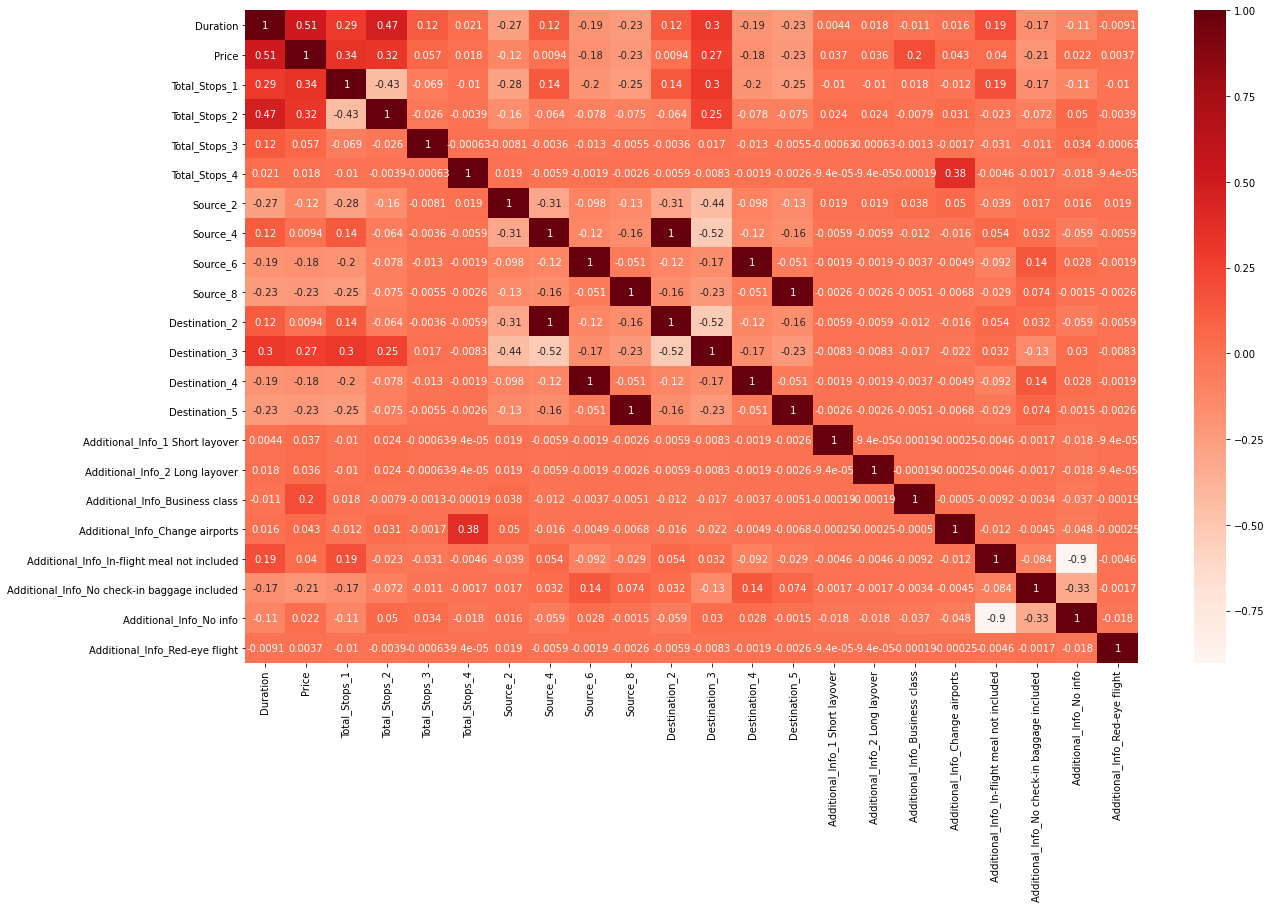

In [33]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),cmap=plt.cm.Reds,annot=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 24 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   Airline                                       10682 non-null  object        
 1   Date_of_Journey                               10682 non-null  datetime64[ns]
 2   Duration                                      10682 non-null  float64       
 3   Price                                         10682 non-null  float64       
 4   Total_Stops_1                                 10682 non-null  uint8         
 5   Total_Stops_2                                 10682 non-null  uint8         
 6   Total_Stops_3                                 10682 non-null  uint8         
 7   Total_Stops_4                                 10682 non-null  uint8         
 8   Source_2                                      10682 non-null  uint

# Feature Selection

In [35]:
df = pd.get_dummies(df, columns=['Airline'],drop_first=True)

In [36]:
X=df
X = X.drop(["Price","Date_of_Journey"],1)
X
#,19,20,21,22,23,24,25,26,27

,Duration,Total_Stops_1,Total_Stops_2,Total_Stops_3,Total_Stops_4,Source_2,Source_4,Source_6,Source_8,Destination_2,Destination_3,Destination_4,Destination_5,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,170.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,445.0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
2,1140.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,325.0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,285.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,150.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
10679,155.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
10680,180.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
10681,160.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [38]:
y = np.log(df.Price)
y

0        8.267962
1        8.944028
2        9.538348
3        8.735204
4        9.495670
           ...   
10678    8.320448
10679    8.329658
10680    8.885856
10681    9.445254
10682    9.371864
Name: Price, Length: 10682, dtype: float64

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# Gradient Boosting

In [40]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators = 200, max_depth = 1, random_state = 1)

In [41]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=1,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [42]:
pred_y = gbr.predict(X_test)
pred_y

array([9.17452895, 9.22187912, 9.61660538, ..., 8.9861677 , 9.50264998,
       9.22187912])

In [43]:
from sklearn.metrics import mean_squared_error as MSE
test_rmse = MSE(y_test, pred_y) ** (1 / 2)
test_rmse

0.25527428026207416

In [44]:
gbr.score(X_train, y_train)

0.7351216443706916

In [45]:
gbr.score(X_test, y_test)

0.7564918273342467

In [46]:
from sklearn.metrics import r2_score 
r2_score(y_test, pred_y)

0.7564918273342467

In [48]:
#Using grid search for finding best parameters
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeRegressor
params = {'learning_rate':[0.1,0.3,0.5,0.7,0.9], 
          "max_depth": [3,5,10],'n_estimators':[10,20,50,70,80,90,100]}
grid_search_cv = GridSearchCV(gbr, params, scoring="r2",verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 105 candidates, totalling 315 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 315 out of 315 | elapsed:  1.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=1,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=200,
                                                 n_iter_no_change=None,
                 

In [49]:
grid_search_cv.best_params_

{'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 70}

In [50]:
gbr = GradientBoostingRegressor(learning_rate=0.3,n_estimators = 70, max_depth = 5, random_state = 1)

In [51]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.3, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=70,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [52]:
pred_y1 = gbr.predict(X_test)
pred_y1

array([9.05456487, 9.3207107 , 9.52075614, ..., 9.13362337, 9.53791457,
       9.18816954])

In [53]:
gbr.score(X_train, y_train)

0.8361853348596566

In [54]:
gbr.score(X_test, y_test)

0.8235312202955641

In [55]:
r2_score(y_test, pred_y1)

0.8235312202955642

# XGBoosting

In [56]:
from xgboost import XGBRegressor

In [58]:
xgb=XGBRegressor()

In [59]:
xgb.fit(X_train,y_train)

[08:56:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [62]:
predict = xgb.predict(X_test)

In [63]:
xgb.score(X_train, y_train)

0.7846627272594527

In [64]:
xgb.score(X_test, y_test)

0.7938727901401534

In [65]:
r2_score(y_test, predict)

0.7938727901401534

In [67]:
#Using grid search for finding best parameters
params={"learning_rate"    : [0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 2, 4, 6, 8, 10],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }
grid_search_cv = GridSearchCV(xgb, params, scoring="r2",verbose=3, cv=3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits
[CV] colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=2, min_child_weight=1 
[09:11:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=2, min_child_weight=1, score=0.741, total=   0.2s
[CV] colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=2, min_child_weight=1 
[09:11:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=2, min_child_weight=1, score=0.757, total=   0.2s
[CV] colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=2, min_child_weight=1 
[09:11:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=2, min_child_weight=1, score=0.755, total=   0.2s
[CV] colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=2, min_child_weight=3 
[09:11:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


Streaming output truncated to the last 5000 lines.
[CV]  colsample_bytree=0.5, gamma=0.3, learning_rate=0.2, max_depth=4, min_child_weight=1, score=0.788, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.3, learning_rate=0.2, max_depth=4, min_child_weight=1 
[09:31:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  colsample_bytree=0.5, gamma=0.3, learning_rate=0.2, max_depth=4, min_child_weight=1, score=0.778, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.3, learning_rate=0.2, max_depth=4, min_child_weight=3 
[09:31:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  colsample_bytree=0.5, gamma=0.3, learning_rate=0.2, max_depth=4, min_child_weight=3, score=0.773, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.3, learning_rate=0.2, max_depth=4, min_child_weight=3 
[09:31:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg

[Parallel(n_jobs=1)]: Done 4800 out of 4800 | elapsed: 34.9min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_...1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.3, 0.4, 0.5, 0.7],
                         'gamma': [0.1, 0.2, 0.3, 0.4],
             

In [68]:
grid_search_cv.best_params_

{'colsample_bytree': 0.4,
 'gamma': 0.1,
 'learning_rate': 0.3,
 'max_depth': 10,
 'min_child_weight': 1}

In [71]:
xgb1=XGBRegressor(colsample_bytree=0.4,gamma= 0.1, learning_rate= 0.3, max_depth= 10, min_child_weight= 1)

In [72]:
xgb1.fit(X_train,y_train)

[09:48:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0.1,
             importance_type='gain', learning_rate=0.3, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [73]:
predict1 = xgb1.predict(X_test)

In [74]:
xgb1.score(X_train, y_train)

0.8369657017125061

In [76]:
xgb1.score(X_test, y_test)

0.8233490234553964